In [2]:
cd /home/sumin/Downloads/archive

/home/sumin/Downloads/archive


In [3]:
import numpy as np 
import pandas as pd 
import os

df = pd.read_csv('/home/sumin/Downloads/archive/16P.csv', encoding='cp1252')
df.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

In [5]:
df.isnull().sum()

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

In [6]:
#target 설정..
y = df['Personality']
x = df.drop(['Response Id', 'Personality'], axis=1)
x.head()

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,0,-2,0,2,0,-1,-1,-1,3
2,0,0,2,0,-1,2,0,0,1,0,...,0,0,2,0,2,-1,0,1,2,1
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,0,-1,-1,0,1,0,-2,-1
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,0,1,0,2,0,1,-1,2,-1


In [7]:
#data 전처리 - columns 너무많고 복잡-> pca로 줄이고 scaler로 값 변환..
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=42)
df_pca = pca.fit_transform(x)
df2 = pd.DataFrame(data = df_pca, columns = ['st1', 'st2','st3','st4','st5','st6','st7','st8','st9','st10','st11','st12','st13','st14','st15',
                                             'st16','st17','st18','st19','st20','st21','st22','st23','st24','st25','st26','st27','st28','st29','st30',
                                            'st31','st32','st33','st34','st35','st36','st37','st38','st39','st40','st41','st42'])
print('explained variance ratio :', pca.explained_variance_ratio_)

data = pd.concat([df2, df['Personality']], axis = 1)
data.head()
#0.80084032 총합..80넘으니 이거 사용..

explained variance ratio : [0.03672224 0.03510802 0.03149472 0.02986834 0.02802144 0.02756804
 0.02564205 0.02404361 0.02359369 0.02194708 0.02103855 0.02019949
 0.01953786 0.01791135 0.01738128 0.01719659 0.01709594 0.01693865
 0.01690647 0.01687221 0.01684907 0.01675395 0.01667655 0.01661634
 0.01660515 0.01656755 0.01653289 0.01646269 0.01640638 0.01627658
 0.01625671 0.01625263 0.01612279 0.01581028 0.01548407 0.01493642
 0.01450718 0.01385591 0.01337993 0.01323622 0.01310948 0.01283393]


,st1,st2,st3,st4,st5,st6,st7,st8,st9,st10,...,st34,st35,st36,st37,st38,st39,st40,st41,st42,Personality
0,0.282356,-0.170399,0.200383,0.480876,0.794010,0.189373,0.558510,0.329840,0.826576,1.013755,...,0.078182,0.468370,-0.010766,0.237763,-0.200612,-0.050391,0.381646,-0.714162,-0.192193,ENFP
1,1.032457,-0.736649,0.192599,-2.681970,-2.870975,-1.416111,1.320712,0.947914,0.142136,0.249573,...,-1.392754,-0.546866,-2.351712,-1.340184,1.798984,0.128501,-1.337457,-0.691765,-1.090009,ISFP
2,2.050173,1.626175,0.399967,-0.123110,0.173916,1.700220,-1.123426,-0.391174,0.316135,1.823681,...,-0.717957,-0.512983,0.702098,-0.836946,-0.234377,-0.270802,0.069957,0.024955,0.593465,INFJ
3,0.269379,0.975698,-2.325314,-1.242397,1.164652,-0.692142,1.063031,1.628793,-1.301689,0.285007,...,0.037226,2.143427,1.869025,0.635486,0.649065,0.039604,0.270601,0.700018,-0.179308,ISTP
4,-2.259683,0.582434,-1.051155,0.064415,0.980330,1.285199,2.402941,0.413098,-0.720924,0.439943,...,0.738659,0.135733,-0.566805,1.145288,1.025411,0.547592,0.331275,0.588292,0.414319,ENFJ


In [9]:
#라벨링~ 글자 없애자~
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
encoder.fit(data['Personality'])
data['Personality']=encoder.transform(data['Personality'])

X = data.drop(['Personality'], axis=1)
Y = data['Personality']
Y.head()

0     1
1    13
2     8
3    15
4     0
Name: Personality, dtype: int64

In [27]:
#train과 test data로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [28]:
Y_test

12628    13
51841    15
47430    11
8525      1
8279      1
         ..
30223    15
34427     8
50238     5
59156     8
36567    14
Name: Personality, Length: 12000, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=8)
voting = VotingClassifier(estimators=[('LR', lr), ('KNN', knn)], voting='soft')

lr.fit(X_train, Y_train)
Y_hat = lr.predict(X_test)
print(accuracy_score(Y_test, Y_hat))

knn.fit(X_train, Y_train)
Y_hat = knn.predict(X_test)
print(accuracy_score(Y_test, Y_hat))

voting.fit(X_train, Y_train)
Y_hat = voting.predict(X_test)
print(accuracy_score(Y_test, Y_hat))

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_hat = rf.predict(X_test)
print(accuracy_score(Y_test, Y_hat))

0.9648333333333333


In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [300],
    'max_depth': [40, 50, 60, 70],
    'min_samples_leaf': [2, 4, 8],
    'min_samples_split': [2, 4, 8]
}

rf = RandomForestClassifier(n_jobs=-1)
cv = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)
cv.fit(X_train, Y_train)

print(cv.best_params_)
print(cv.best_score_)

/home/sumin/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_depth': 60, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
0.9659992034760565


In [18]:
rf = RandomForestClassifier(n_estimators=300, max_depth=60, min_samples_leaf=2, min_samples_split=2)
rf.fit(X_train, Y_train)
Y_hat = rf.predict(X_test)
print(accuracy_score(Y_test, Y_hat))

0.96625


In [22]:
#random forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_hat)

print('Confusion Matrix is : \n', cm)

Confusion Matrix is : 
 [[720   0   2   0   0   2   1   2   1   5   1   1   1   1   0   2]
 [  1 762   0   0   0   0   1   0   2   1   2   1   2   1   0   0]
 [  1   1 722   1   3   1   1   1   0   3   0   1   1   0   2   0]
 [  0   1   4 726   0   1   0   3   0   1   0   1   3   4   3   1]
 [  0   1   2   0 732   6   2   6   7   2   4   1   2   0   4   1]
 [  1   1   2   0   1 766   2   3   3   1   2   4   1   1   1   1]
 [  0   3   1   1   0   4 706   1   1  11   0   6   5   0   0   0]
 [  1   2   1   1   4   0   0 753   3   3   2   1   1   0   1   0]
 [  1   1   2   3   0   1   1   2 747   0   2   4   2   2   5   2]
 [  5   0   4   3   3   0   6   1   0 717   2   1   0   1   5   1]
 [  3   1   1   2   0   0   1   0   0   1 683   2   1   4   0   0]
 [  1   3   1   3   0   2   0   2   2   1   6 720   0   0   3   0]
 [  3   1   2   2   0   1   5   1   3   7   1   2 719   1   1   4]
 [  0   6   2   2   1   0   0   1   6   8   3   1   0 712   0   3]
 [  0   0   4   0   1   0   1   1   0 

<BarContainer object of 20 artists>

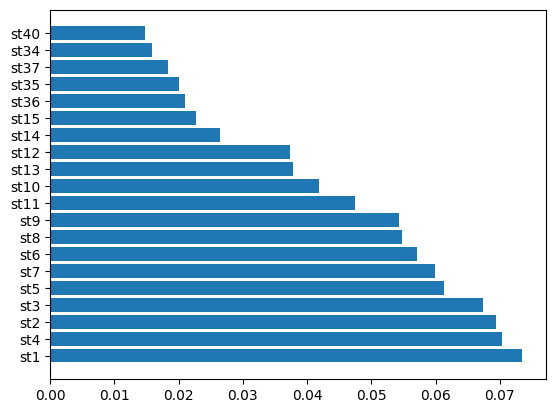

In [20]:
import matplotlib.pyplot as plt

imp_values = rf.feature_importances_
imp = pd.DataFrame(data=imp_values, columns=['value'])
imp['name'] = X_train.columns
top20 = imp.sort_values(by='value', ascending=False)[:20]
plt.barh(top20['name'], top20['value'])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, Y_train)
Y_hat = gbm.predict(X_test)
print(accuracy_score(Y_test, Y_hat))

In [ ]:
pip install xgboost

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, early_stopping_rounds=100, objective = 'multi:softmax', 
                    num_class = 16, eval_metric="mlogloss")
xgb.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])
Y_hat = xgb.predict(X_test)
print(accuracy_score(Y_test, Y_hat))
y_prob = xgb.predict_proba(X_test)
print(roc_auc_score(Y_test, y_prob, average='macro', multi_class='ovr'))

[0]	validation_0-mlogloss:1.52807
[1]	validation_0-mlogloss:1.23484
[2]	validation_0-mlogloss:1.03709
[3]	validation_0-mlogloss:0.89180
[4]	validation_0-mlogloss:0.77898
[5]	validation_0-mlogloss:0.69108
[6]	validation_0-mlogloss:0.61768
[7]	validation_0-mlogloss:0.55863
[8]	validation_0-mlogloss:0.50938
[9]	validation_0-mlogloss:0.46790
[10]	validation_0-mlogloss:0.43397
[11]	validation_0-mlogloss:0.40455
[12]	validation_0-mlogloss:0.37986
[13]	validation_0-mlogloss:0.35913
[14]	validation_0-mlogloss:0.33987
[15]	validation_0-mlogloss:0.32329
[16]	validation_0-mlogloss:0.30874
[17]	validation_0-mlogloss:0.29697
[18]	validation_0-mlogloss:0.28535
[19]	validation_0-mlogloss:0.27606
[20]	validation_0-mlogloss:0.26818
[21]	validation_0-mlogloss:0.25966
[22]	validation_0-mlogloss:0.25343
[23]	validation_0-mlogloss:0.24740
[24]	validation_0-mlogloss:0.24206
[25]	validation_0-mlogloss:0.23789
[26]	validation_0-mlogloss:0.23312
[27]	validation_0-mlogloss:0.22982
[28]	validation_0-mlogloss:0.2

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators=150, early_stopping_rounds=60, objective = 'multi:softmax', 
                    num_class = 16, eval_metric="mlogloss")
params = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'colsample_bytree': [0.5, 0.75]
}
cv = GridSearchCV(xgb, param_grid=params, cv=5)
cv.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])
print(cv.best_params_)
print(cv.best_score_)

In [33]:
xgb = XGBClassifier(n_estimators=150, early_stopping_rounds=60, objective = 'multi:softmax', num_class = 16
                    , eval_metric="mlogloss", colsample_bytree=0.5, max_depth=5, min_child_weight=1)
xgb.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])
Y_hat = xgb.predict(X_test)
print(accuracy_score(Y_test, Y_hat))
y_prob = xgb.predict_proba(X_test)
print(roc_auc_score(Y_test, y_prob, average='macro', multi_class='ovr'))

[0]	validation_0-mlogloss:1.97157
[1]	validation_0-mlogloss:1.64072
[2]	validation_0-mlogloss:1.39839
[3]	validation_0-mlogloss:1.21311
[4]	validation_0-mlogloss:1.07573
[5]	validation_0-mlogloss:0.95433
[6]	validation_0-mlogloss:0.85965
[7]	validation_0-mlogloss:0.78258
[8]	validation_0-mlogloss:0.71414
[9]	validation_0-mlogloss:0.65320
[10]	validation_0-mlogloss:0.60339
[11]	validation_0-mlogloss:0.56127
[12]	validation_0-mlogloss:0.52158
[13]	validation_0-mlogloss:0.49078
[14]	validation_0-mlogloss:0.45986
[15]	validation_0-mlogloss:0.43189
[16]	validation_0-mlogloss:0.41224
[17]	validation_0-mlogloss:0.39230
[18]	validation_0-mlogloss:0.37579
[19]	validation_0-mlogloss:0.35977
[20]	validation_0-mlogloss:0.34427
[21]	validation_0-mlogloss:0.33053
[22]	validation_0-mlogloss:0.31995
[23]	validation_0-mlogloss:0.30949
[24]	validation_0-mlogloss:0.29879
[25]	validation_0-mlogloss:0.29130
[26]	validation_0-mlogloss:0.28339
[27]	validation_0-mlogloss:0.27686
[28]	validation_0-mlogloss:0.2

In [26]:
#xgb
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_hat)

print('Confusion Matrix is : \n', cm)

Confusion Matrix is : 
 [[722   1   1   1   1   2   1   3   1   2   1   0   0   1   0   2]
 [  1 757   0   3   0   0   1   0   2   1   1   3   3   0   1   0]
 [  0   1 723   2   3   0   1   1   0   2   0   2   2   0   0   1]
 [  0   1   2 728   0   1   2   3   0   1   0   1   1   3   3   2]
 [  0   1   2   1 737   4   1   1   7   2   5   3   1   2   3   0]
 [  1   0   2   0   1 769   1   1   3   1   2   4   1   1   1   2]
 [  0   4   1   0   1   1 712   1   1   9   0   3   6   0   0   0]
 [  0   1   1   0   5   0   0 757   1   2   2   3   1   0   0   0]
 [  1   0   3   1   0   1   1   1 743   0   1   9   3   3   4   4]
 [  9   0   3   1   3   0   7   2   1 713   3   0   1   0   5   1]
 [  2   1   1   1   1   0   1   0   0   2 676   6   1   5   1   1]
 [  1   1   0   4   1   3   1   1   1   2   5 719   2   0   3   0]
 [  3   0   2   1   0   1   6   0   1   7   1   1 724   1   1   4]
 [  0   4   0   1   1   0   0   1   4   5   2   2   0 721   0   4]
 [  0   1   1   1   1   0   1   1   0 

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb, ax=axs, max_num_features=20, height=0.4)

In [ ]:
pip install lightgbm

In [29]:
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=300, early_stopping_round=100, objective="multiclass", force_col_wise=True)
lgbm.fit(X_train, Y_train, eval_metric="multi_logloss", eval_set=[(X_test, Y_test)])
Y_hat = lgbm.predict(X_test)
print(accuracy_score(Y_test, Y_hat))
y_prob = lgbm.predict_proba(X_test)
print(roc_auc_score(Y_test, y_prob, average='macro', multi_class='ovr'))

[LightGBM] [Info] Total Bins 10710
[LightGBM] [Info] Number of data points in the train set: 47999, number of used features: 42
[LightGBM] [Info] Start training from score -2.771235
[LightGBM] [Info] Start training from score -2.776911
[LightGBM] [Info] Start training from score -2.772901
[LightGBM] [Info] Start training from score -2.768576
[LightGBM] [Info] Start training from score -2.780600
[LightGBM] [Info] Start training from score -2.779593
[LightGBM] [Info] Start training from score -2.765923
[LightGBM] [Info] Start training from score -2.780600
[LightGBM] [Info] Start training from score -2.777245
[LightGBM] [Info] Start training from score -2.777580
[LightGBM] [Info] Start training from score -2.758008
[LightGBM] [Info] Start training from score -2.773235
[LightGBM] [Info] Start training from score -2.777245
[LightGBM] [Info] Start training from score -2.772235
[LightGBM] [Info] Start training from score -2.767249
[LightGBM] [Info] Start training from score -2.762618
Training

In [ ]:
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier(n_estimators=120, early_stopping_round=50, objective="multiclass", force_col_wise=True)
params = {
    'num_leaves': [32, 64],
    'max_depth': [32, 64, 128],
    'min_child_samples': [60, 100],
    'subsample': [0.8, 1]
}
cv = GridSearchCV(lgbm, param_grid=params, cv=5)
cv.fit(X_train, Y_train, eval_metric="multi_logloss", eval_set=[(X_test, Y_test)])
print(cv.best_params_)
print(cv.best_score_)

In [30]:
lgbm = LGBMClassifier(n_estimators=120, early_stopping_round=50, max_depth=32, min_child_samples=100, num_leaves=32, subsample=0.8
                     , objective="multiclass", force_col_wise=True)
lgbm.fit(X_train, Y_train, eval_metric="multi_logloss", eval_set=[(X_test, Y_test)])
Y_hat = lgbm.predict(X_test)
print(accuracy_score(Y_test, Y_hat))
y_prob = lgbm.predict_proba(X_test)
print(roc_auc_score(Y_test, y_prob, average='macro', multi_class='ovr'))

[LightGBM] [Info] Total Bins 10710
[LightGBM] [Info] Number of data points in the train set: 47999, number of used features: 42
[LightGBM] [Info] Start training from score -2.771235
[LightGBM] [Info] Start training from score -2.776911
[LightGBM] [Info] Start training from score -2.772901
[LightGBM] [Info] Start training from score -2.768576
[LightGBM] [Info] Start training from score -2.780600
[LightGBM] [Info] Start training from score -2.779593
[LightGBM] [Info] Start training from score -2.765923
[LightGBM] [Info] Start training from score -2.780600
[LightGBM] [Info] Start training from score -2.777245
[LightGBM] [Info] Start training from score -2.777580
[LightGBM] [Info] Start training from score -2.758008
[LightGBM] [Info] Start training from score -2.773235
[LightGBM] [Info] Start training from score -2.777245
[LightGBM] [Info] Start training from score -2.772235
[LightGBM] [Info] Start training from score -2.767249
[LightGBM] [Info] Start training from score -2.762618
Training

In [31]:
#LightGBM
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_hat)

print('Confusion Matrix is : \n', cm)

Confusion Matrix is : 
 [[721   1   2   1   0   2   1   3   1   1   2   1   0   1   0   2]
 [  1 755   1   3   0   0   1   1   2   1   2   3   3   0   0   0]
 [  0   1 725   1   3   0   0   1   0   2   1   2   2   0   0   0]
 [  0   0   2 725   0   1   2   3   0   2   0   0   2   5   4   2]
 [  2   1   1   0 741   3   1   1   6   3   4   1   1   1   3   1]
 [  1   0   1   0   2 764   1   1   3   2   2   6   1   1   2   3]
 [  0   4   0   1   0   2 708   1   2   9   0   3   8   0   0   1]
 [  0   1   1   2   6   0   0 755   1   0   3   2   2   0   0   0]
 [  1   0   4   2   0   1   0   1 744   0   2   6   2   3   6   3]
 [  7   0   3   2   3   0   8   2   1 713   1   0   1   1   4   3]
 [  1   1   1   2   1   0   1   0   0   2 679   5   1   3   1   1]
 [  0   1   0   2   0   3   1   0   2   1   4 724   0   0   6   0]
 [  3   1   2   1   0   1   4   0   2   9   2   1 721   2   1   3]
 [  0   5   0   2   2   0   0   1   5   5   4   2   1 714   0   4]
 [  0   0   1   0   2   0   1   1   0 